# Geoshapes

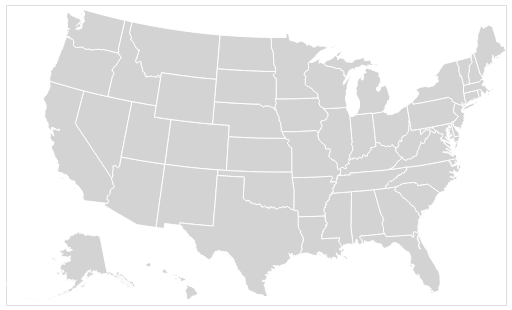

In [1]:
from vega_datasets import data
import ibis_vega_transform
import altair as alt

states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
chart = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')
chart